<a href="https://colab.research.google.com/github/karolgil33/Regresores/blob/main/miniproyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip"
!unzip /content/seoul+bike+sharing+demand.zip
!rm /content/seoul+bike+sharing+demand.zip
#wget descargar archivos web
#unzip descomprimir
#rm eliminar archivo

--2023-09-02 14:47:30--  https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seoul+bike+sharing+demand.zip’

seoul+bike+sharing+     [  <=>               ] 590.13K  1.83MB/s    in 0.3s    

2023-09-02 14:47:31 (1.83 MB/s) - ‘seoul+bike+sharing+demand.zip’ saved [604298]

Archive:  /content/seoul+bike+sharing+demand.zip
 extracting: SeoulBikeData.csv       


# **ANALISIS EXPLORATORIO DE LOS DATOS**

In [ ]:
!wget https://archive.ics.uci.edu/static/public/409/daily+demand+forecasting+orders.zip

--2023-09-09 13:09:06--  https://archive.ics.uci.edu/static/public/409/daily+demand+forecasting+orders.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘daily+demand+forecasting+orders.zip’

daily+demand+foreca     [ <=>                ]   5.18K  --.-KB/s    in 0s      

2023-09-09 13:09:06 (61.8 MB/s) - ‘daily+demand+forecasting+orders.zip’ saved [5306]



In [ ]:
!unzip '/content/daily+demand+forecasting+orders.zip'
import pandas as pd
from sklearn.decomposition import PCA

unzip:  cannot find or open /content/daily+demand+forecasting+orders.zip, /content/daily+demand+forecasting+orders.zip.zip or /content/daily+demand+forecasting+orders.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
names_colum = ['Week of the month','Day of the week','Non-urgent order','Urgent order','Order type A','Order type B','Order type C','Fiscal sector orders','Orders from the traffic controller sector','Banking orders (1)','Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']
df = pd.read_csv('/content/drive/MyDrive/CodigosIA/Daily_Demand_Forecasting_Orders.csv', names = names_colum, header= 0,sep = ";") #ISO-8859-1 codificación de caracteres

In [ ]:
df

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [ ]:
df.shape #tamaño del dataset

(60, 13)

In [ ]:
df.info()#información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Week of the month                          60 non-null     int64  
 1   Day of the week                            60 non-null     int64  
 2   Non-urgent order                           60 non-null     float64
 3   Urgent order                               60 non-null     float64
 4   Order type A                               60 non-null     float64
 5   Order type B                               60 non-null     float64
 6   Order type C                               60 non-null     float64
 7   Fiscal sector orders                       60 non-null     float64
 8   Orders from the traffic controller sector  60 non-null     int64  
 9   Banking orders (1)                         60 non-null     int64  
 10  Banking orders (2)          

In [ ]:
df.describe(include='all') # información estadistica y general del datset

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [ ]:
df.isna().sum()#cantidad de valores NAN (Not a Number)

Week of the month                            0
Day of the week                              0
Non-urgent order                             0
Urgent order                                 0
Order type A                                 0
Order type B                                 0
Order type C                                 0
Fiscal sector orders                         0
Orders from the traffic controller sector    0
Banking orders (1)                           0
Banking orders (2)                           0
Banking orders (3)                           0
Target (Total orders)                        0
dtype: int64

In [ ]:
df.duplicated() #Cantidad de valores duplicados

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [ ]:
#pca = PCA(n_components=0.95) # una instancia de PCA y especificar la varianza para el 95% de varianza

#data_pca = pca.fit_transform(df)

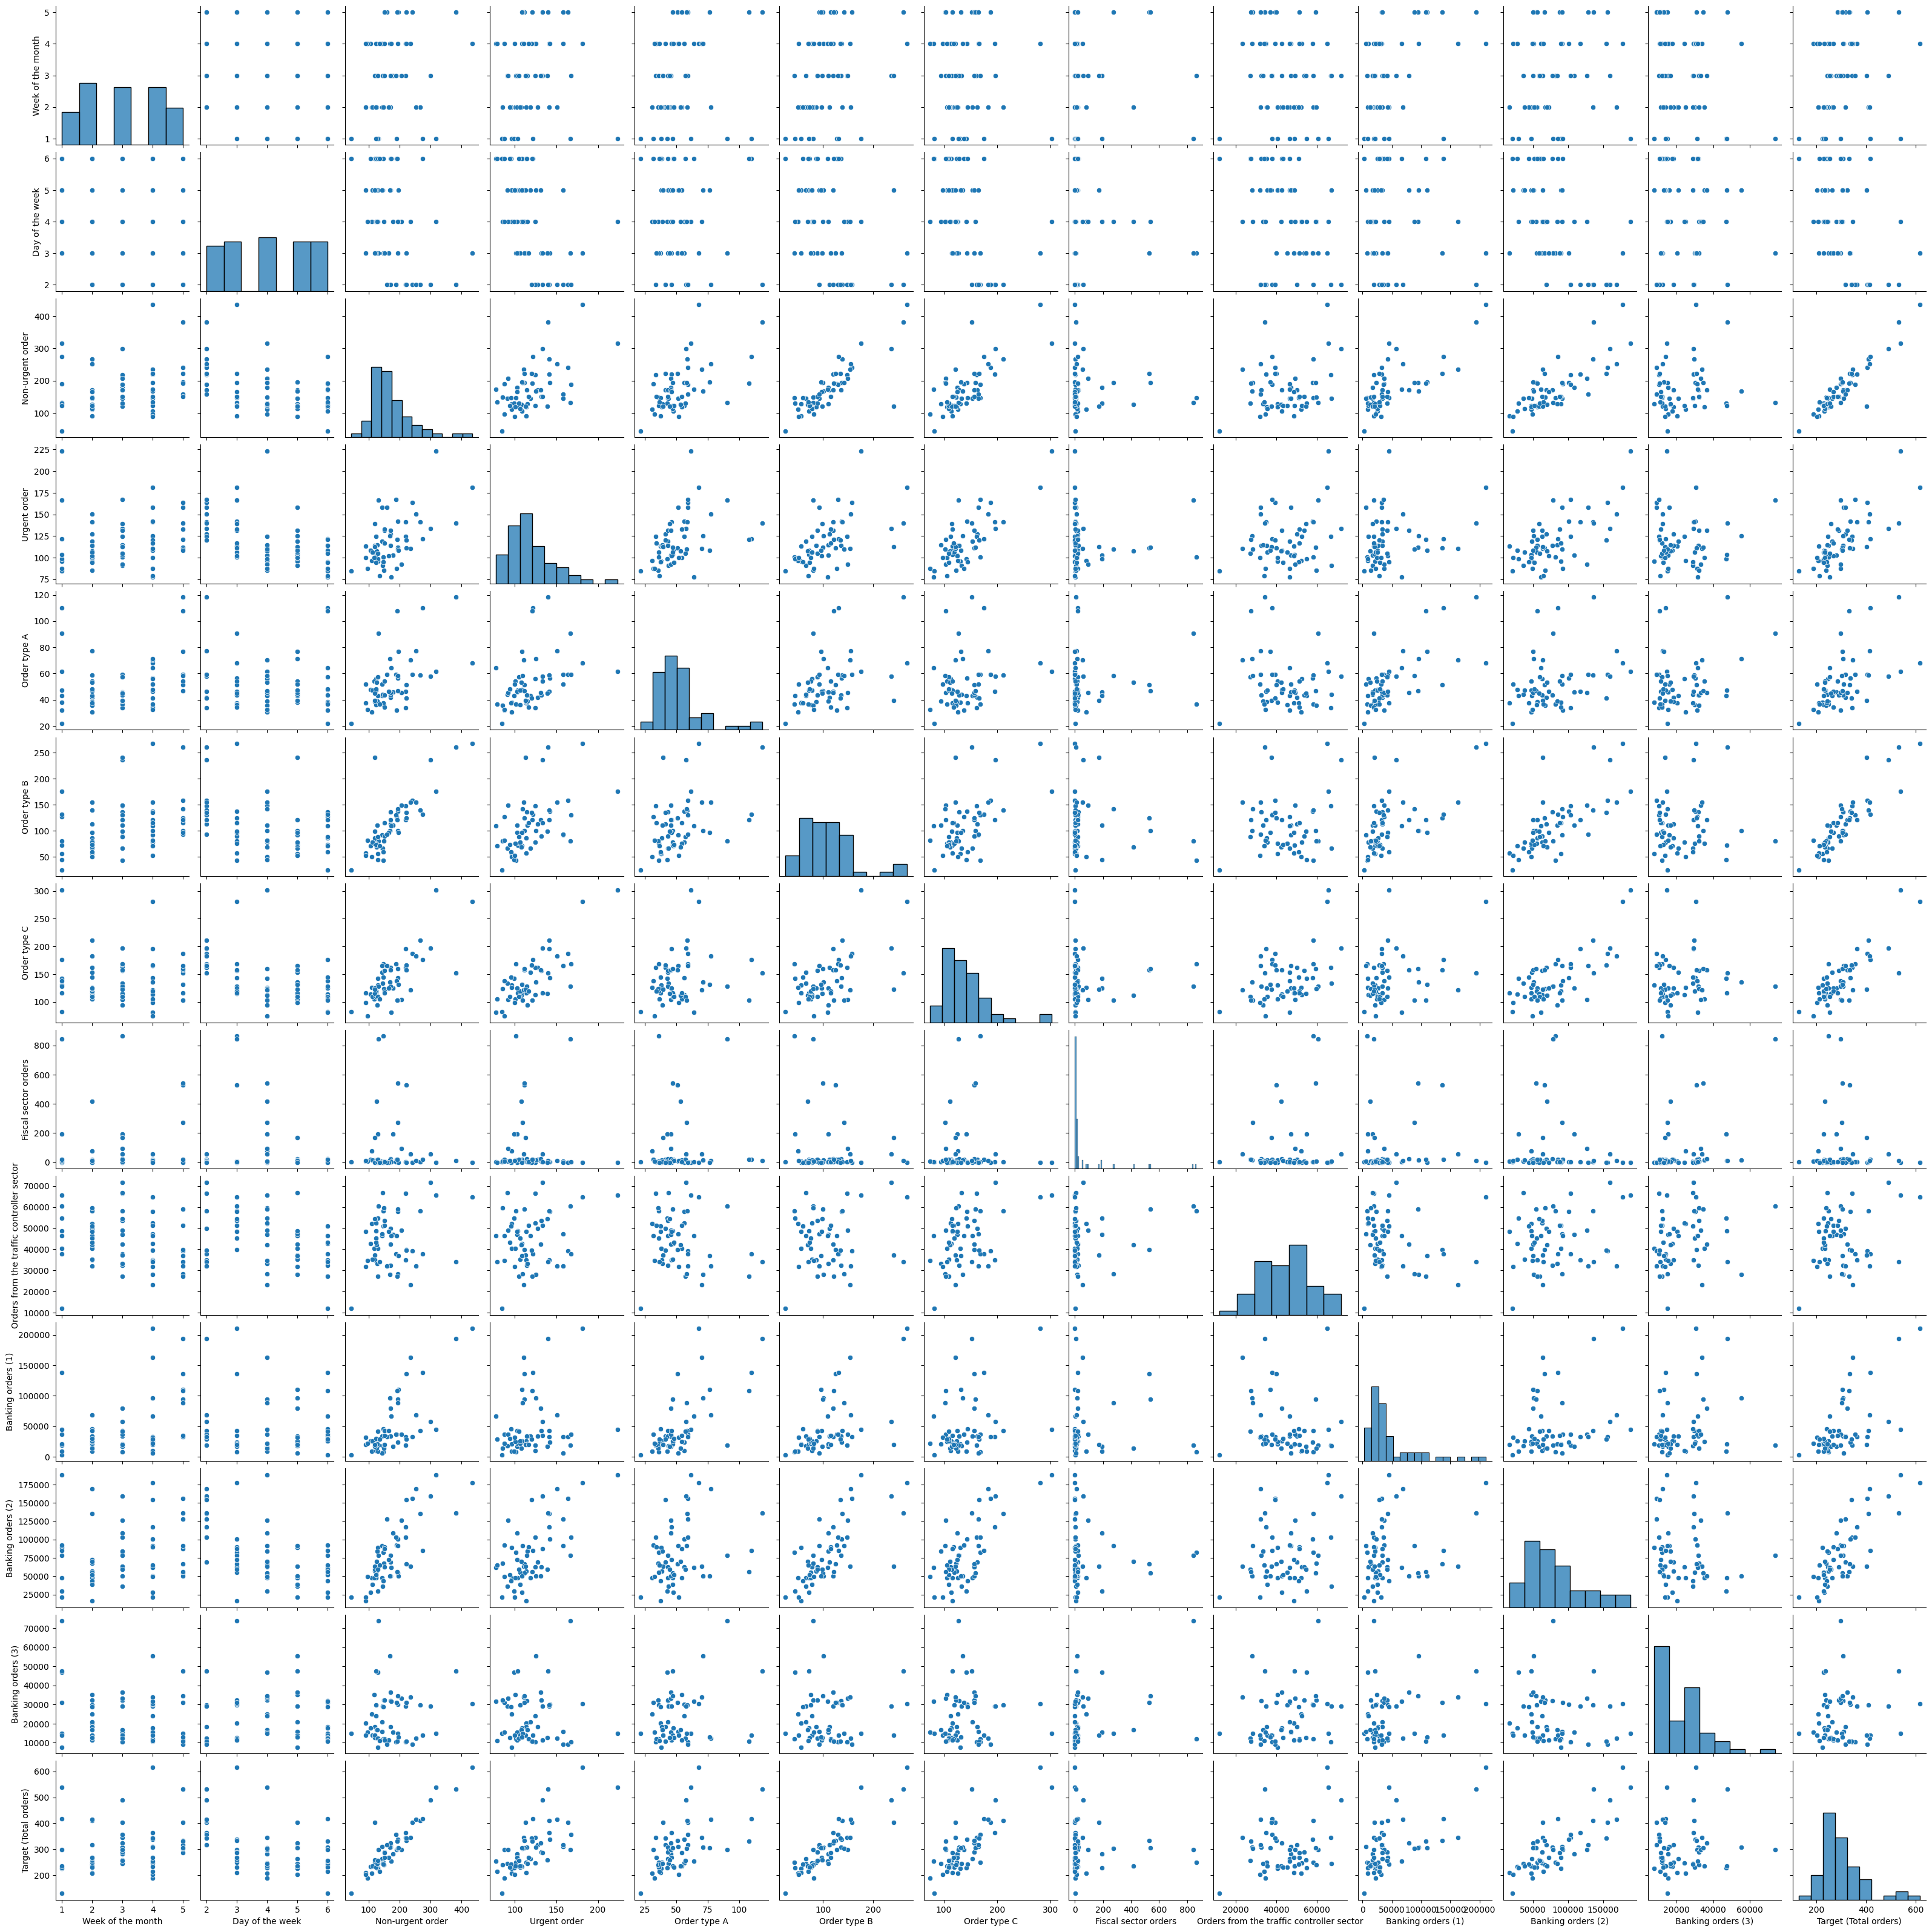

In [ ]:
#Matriz de comparación entre variables
sns.pairplot(df)

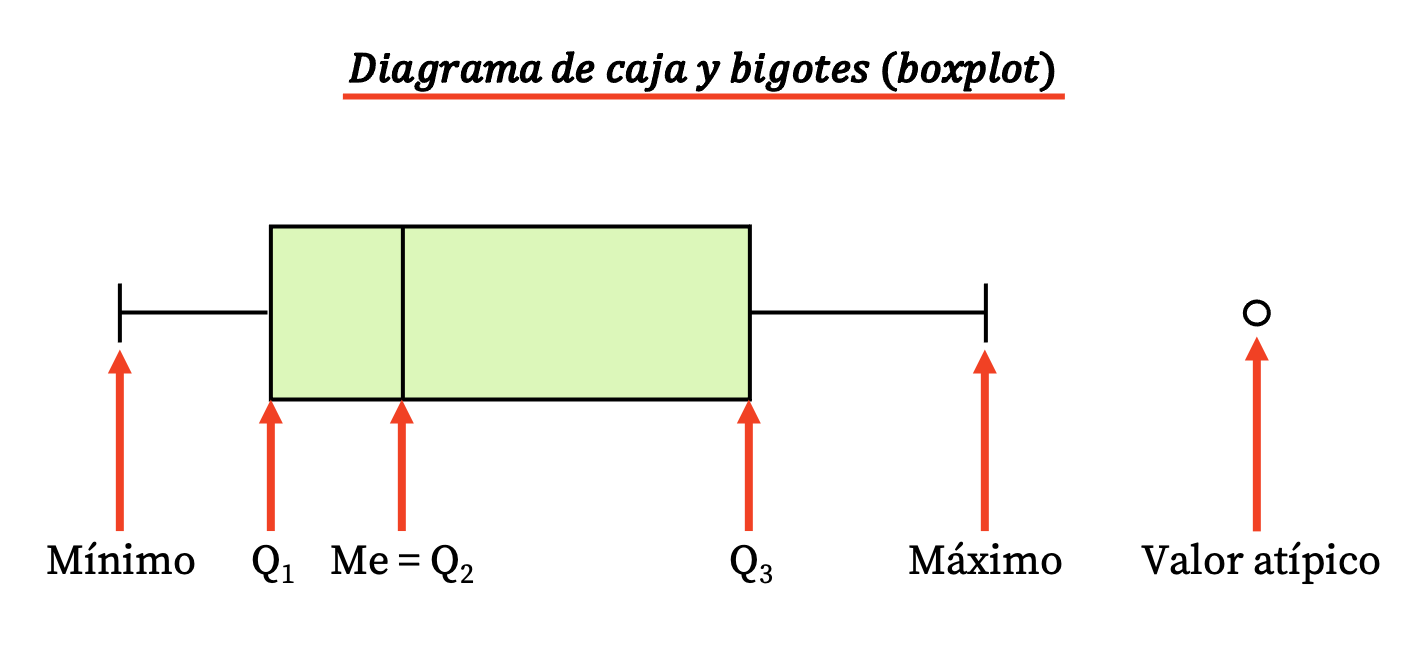

In [ ]:
numeric_features= df.select_dtypes(exclude='object')

Horario_dataset = df[['Week of the month', 'Day of the week']]


In [ ]:
numeric_features

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


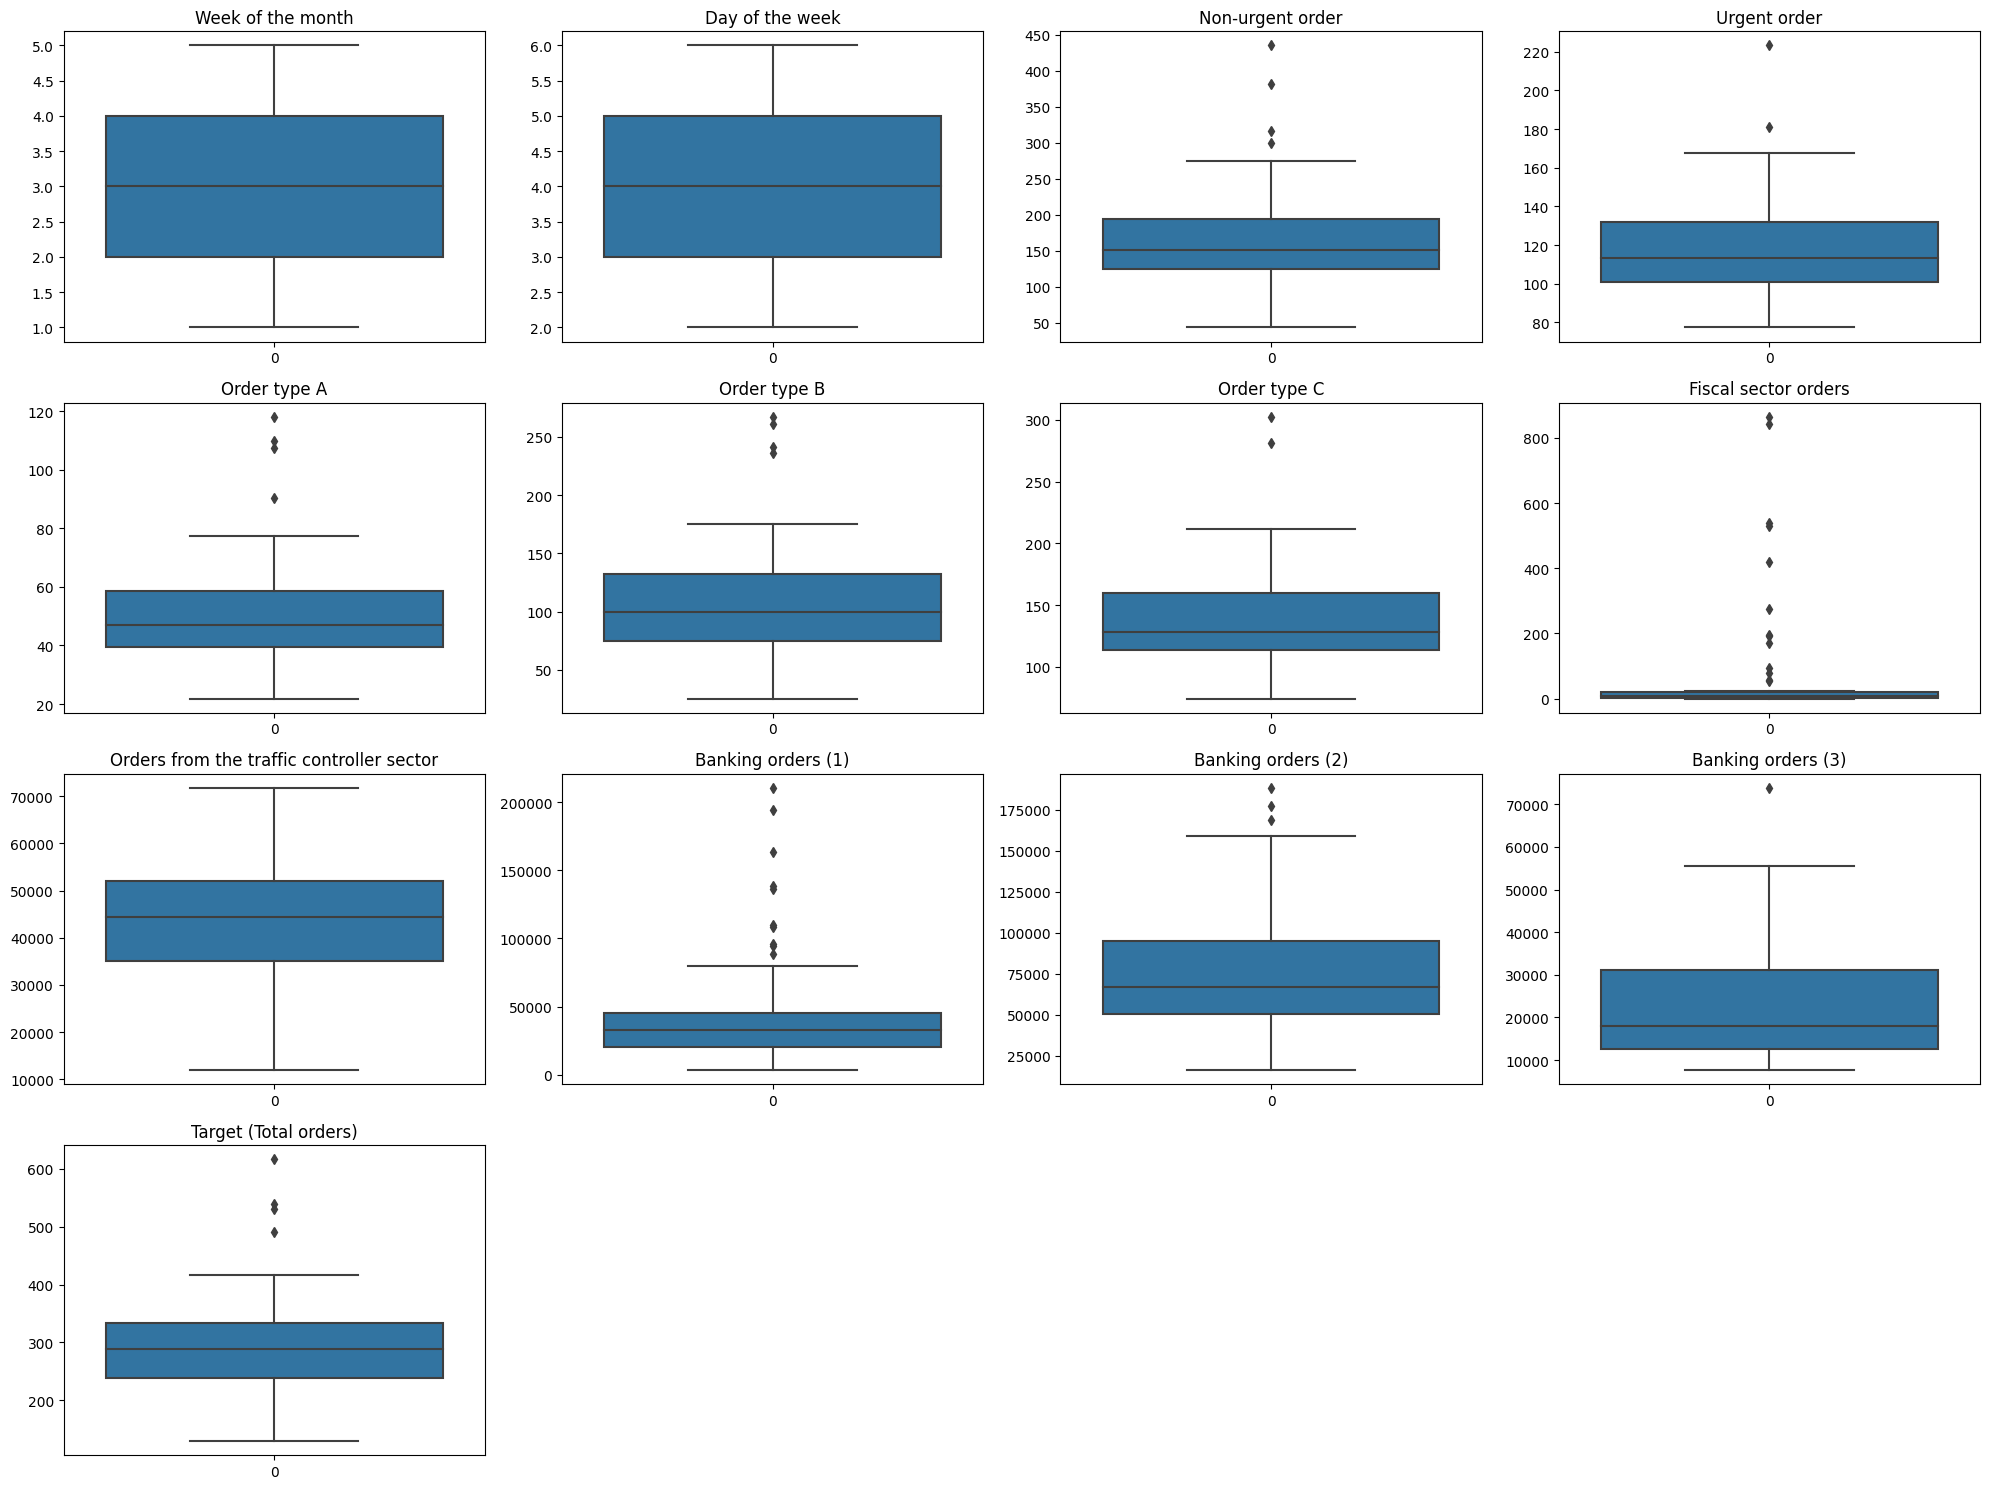

In [ ]:
#Diagrama de cajas para cada variable numerica '
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()



====================================================================== Week of the month ======================================================================




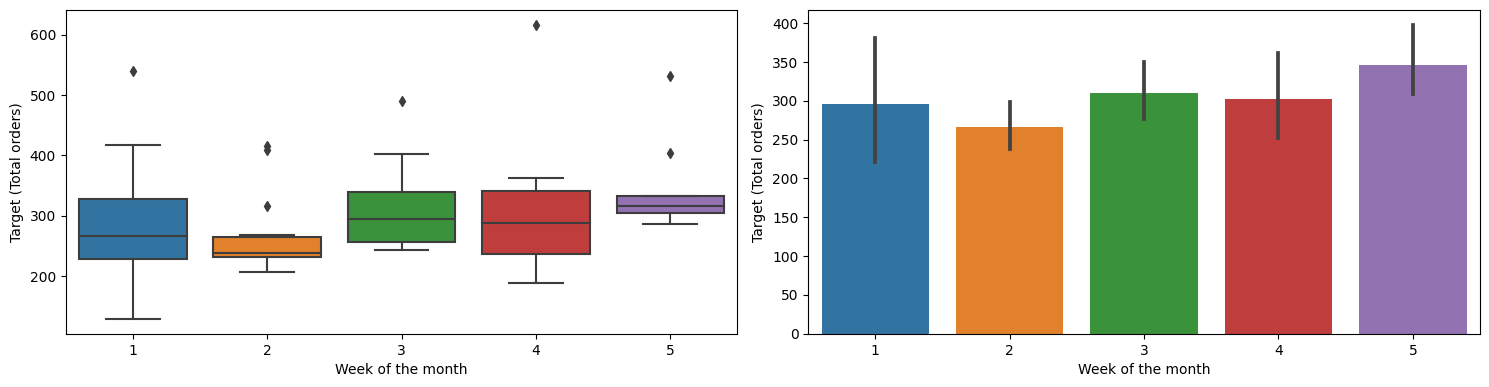



====================================================================== Day of the week ======================================================================




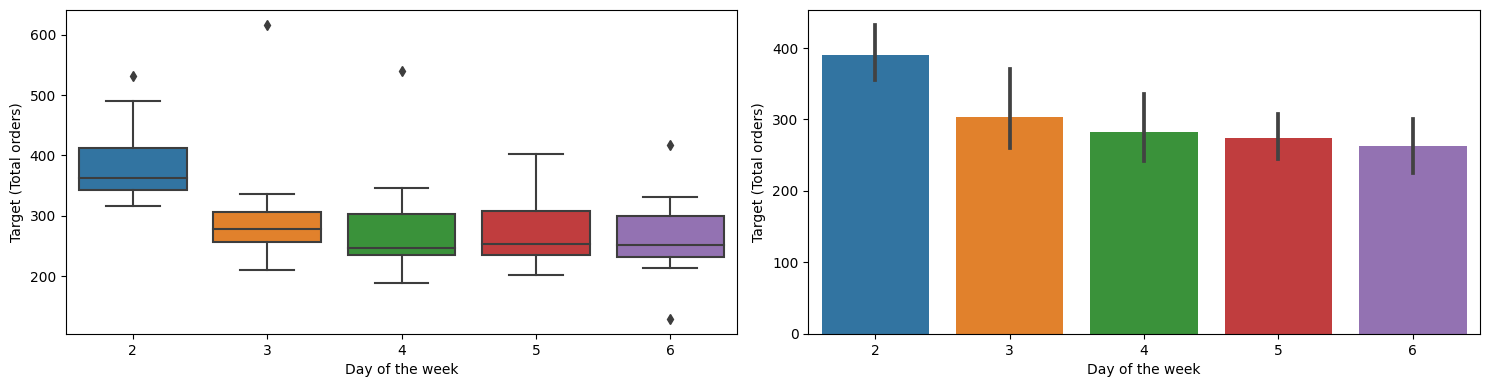

In [ ]:
# Diagrama de barras y de cajas '
n=1
for i in Horario_dataset.columns:
  plt.figure(figsize=(15,15))
  plt.subplot(4,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=df[i],y=df["Target (Total orders)"])
  plt.subplot(4,2,n)
  n+= 1
  sns.barplot(x= df[i],y = df['Target (Total orders)'])
  plt.tight_layout()
  plt.show()

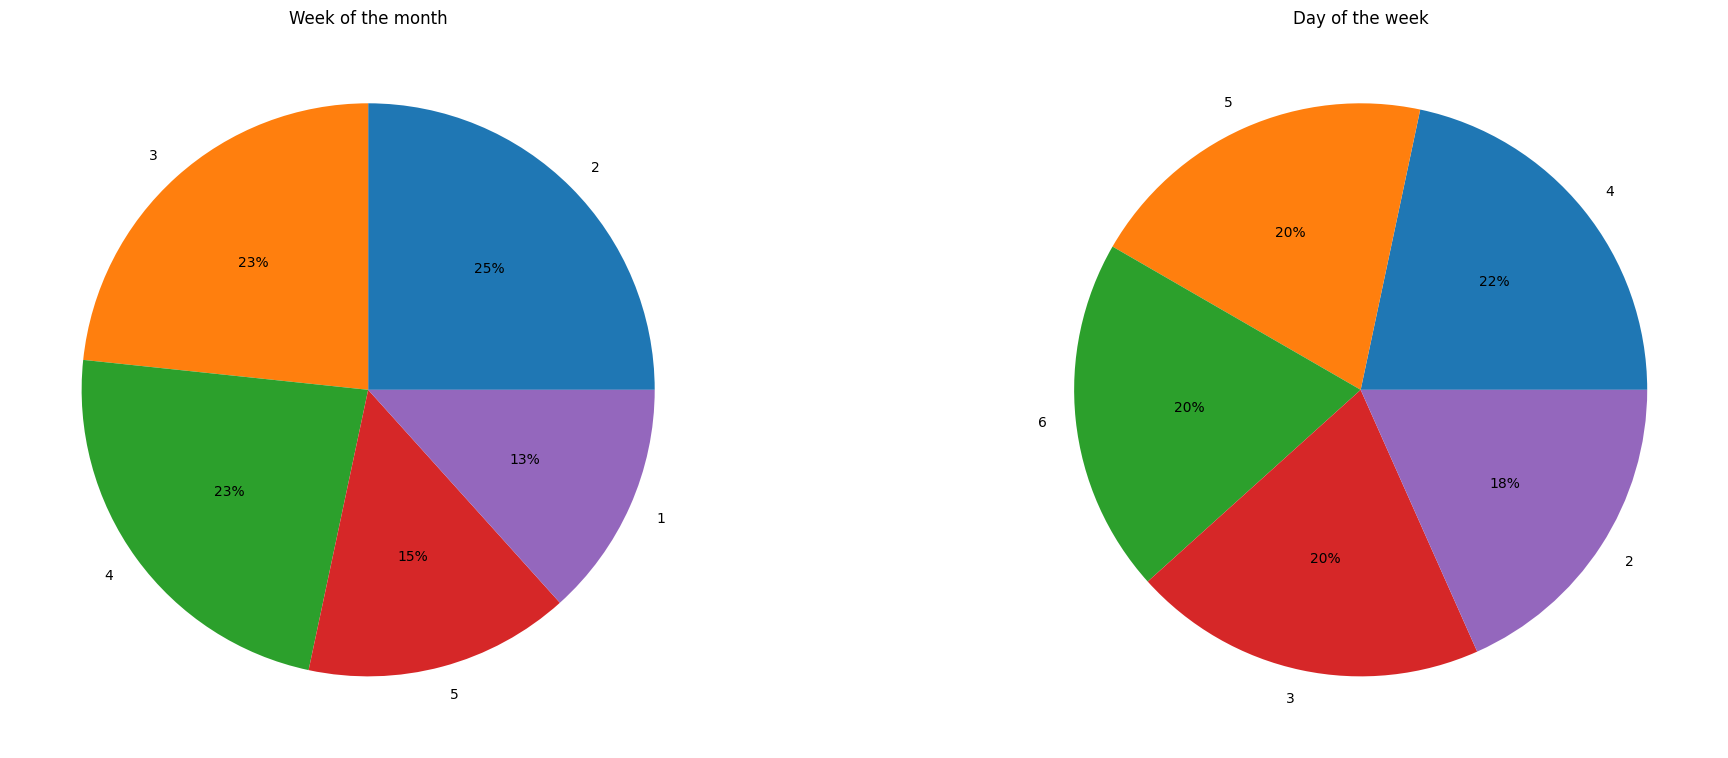

In [ ]:
# diagrama de torta para variables categoricas '
n=1
plt.figure(figsize=(20,15))
for i in Horario_dataset.columns:
  plt.subplot(2,2,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()



====================================================================== Week of the month ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


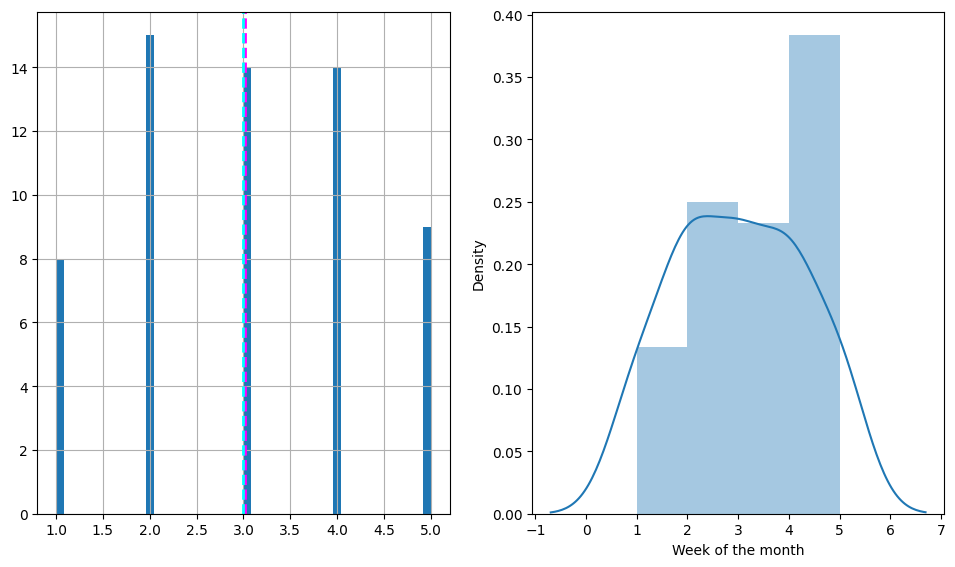



====================================================================== Day of the week ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


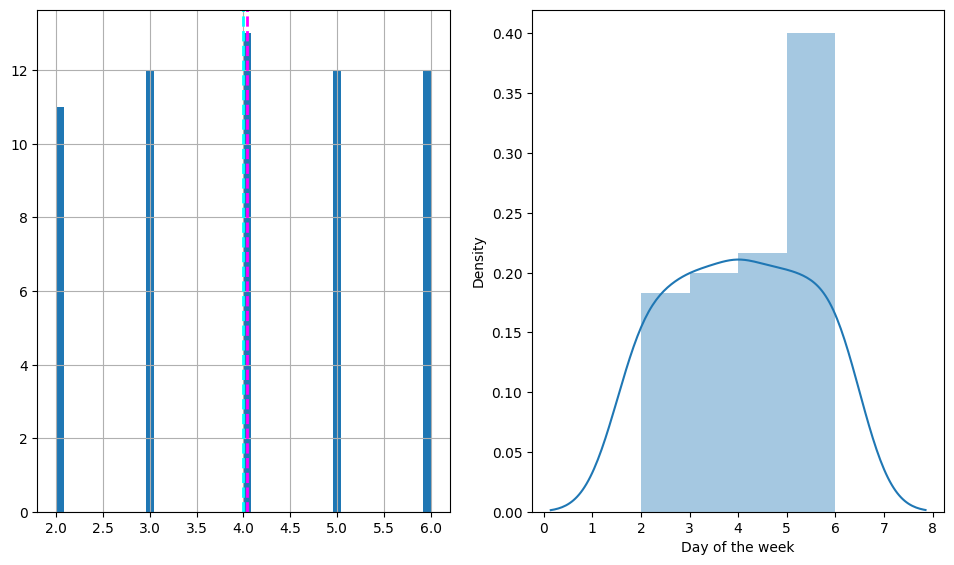



====================================================================== Non-urgent order ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


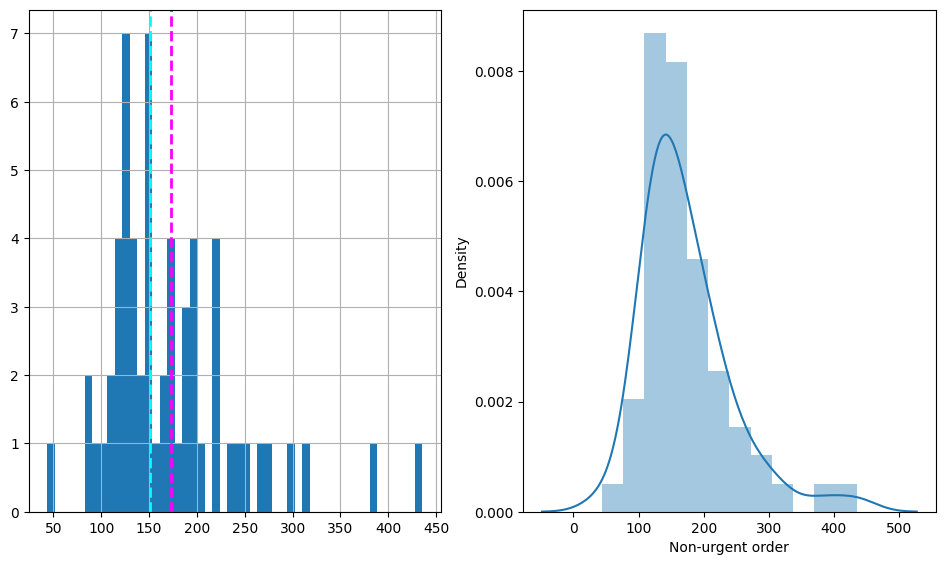



====================================================================== Urgent order ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


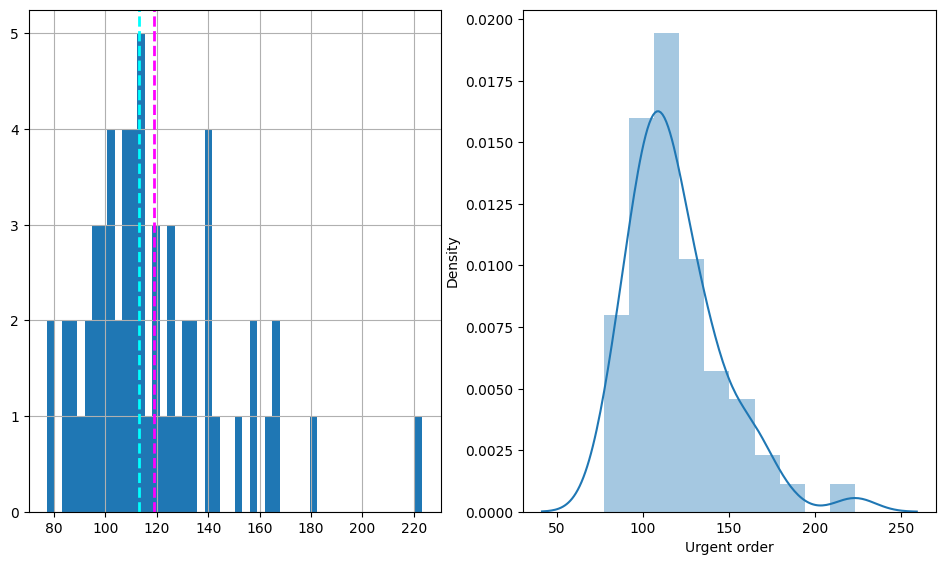



====================================================================== Order type A ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


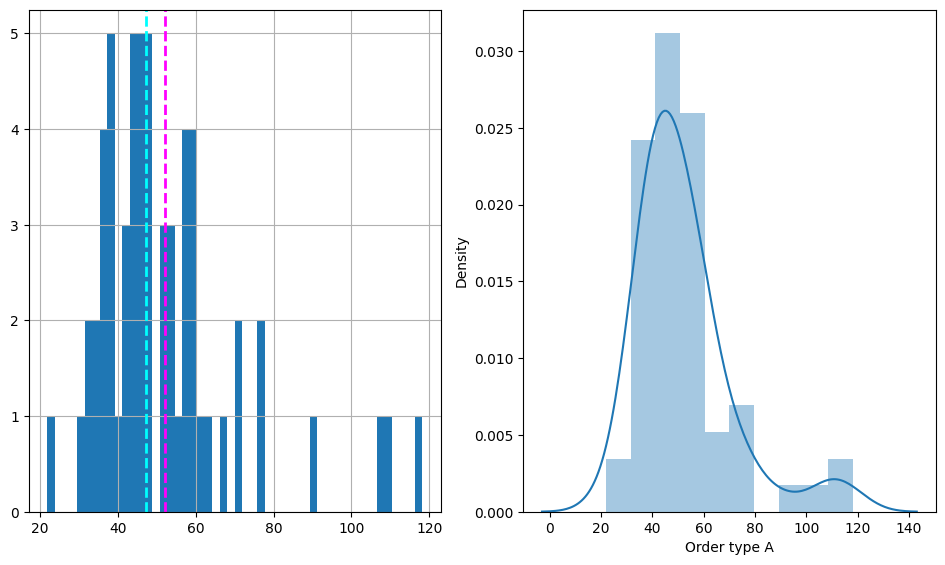



====================================================================== Order type B ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


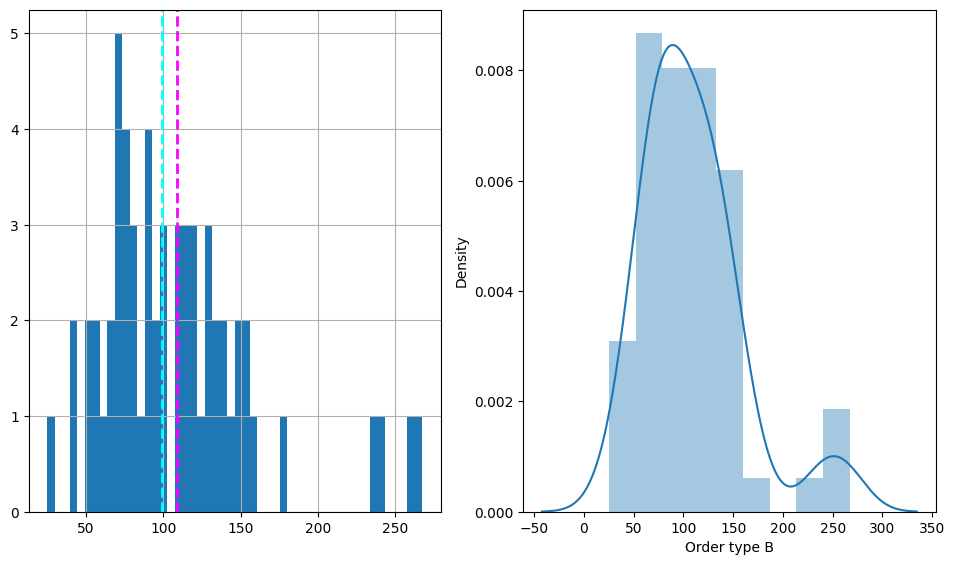



====================================================================== Order type C ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


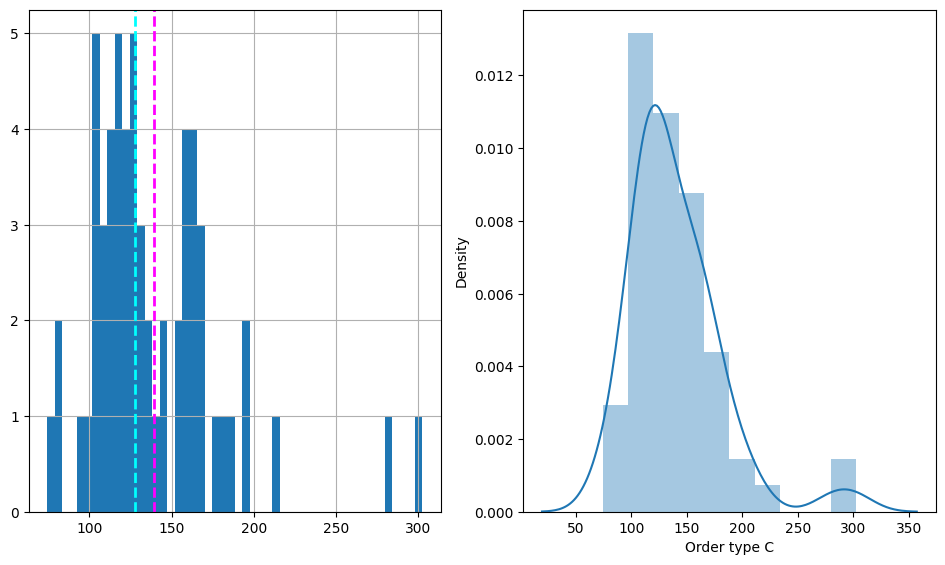



====================================================================== Fiscal sector orders ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


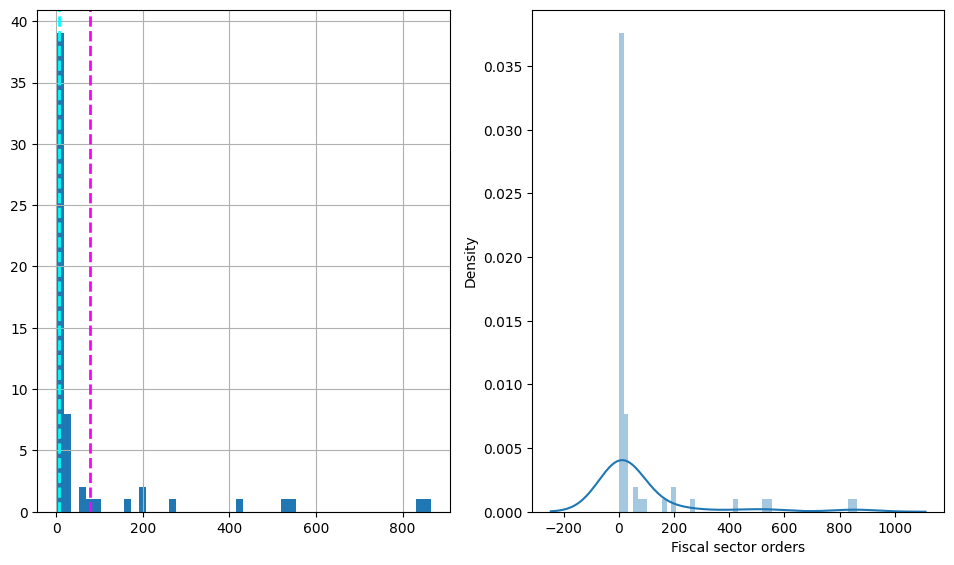



====================================================================== Orders from the traffic controller sector ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


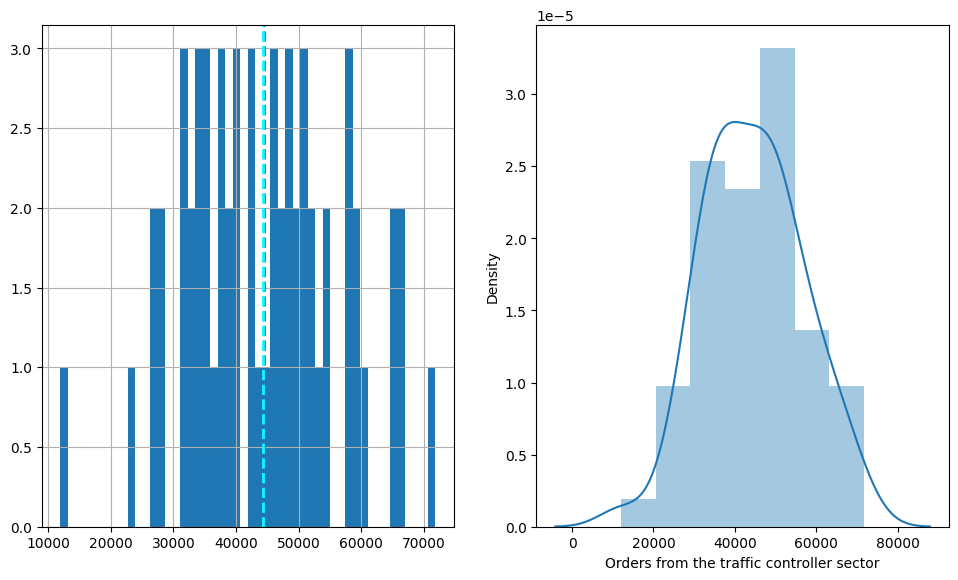



====================================================================== Banking orders (1) ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


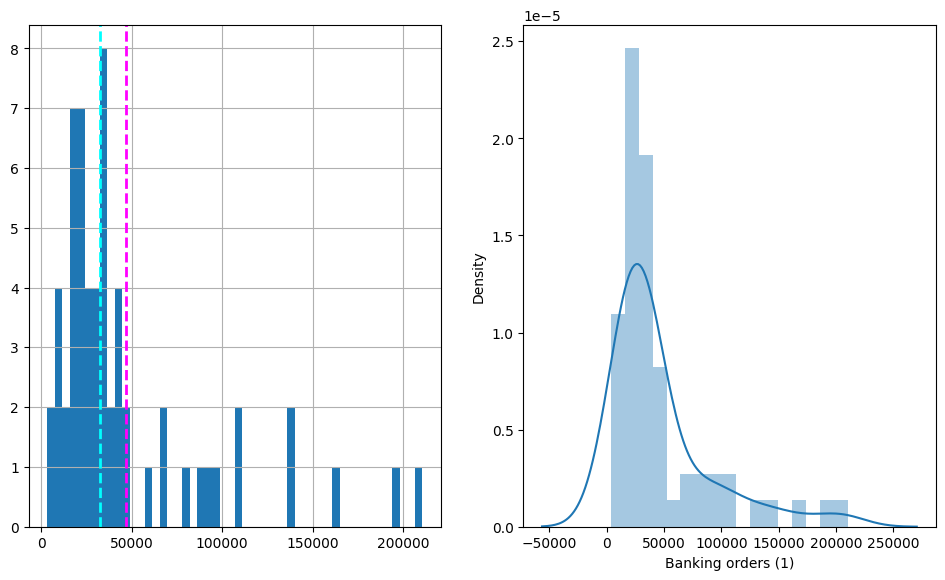



====================================================================== Banking orders (2) ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


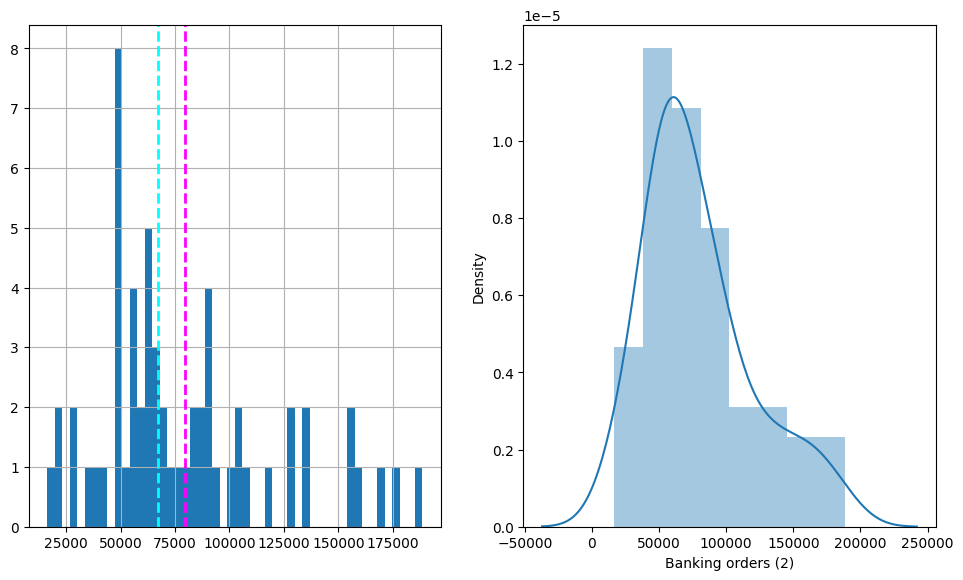



====================================================================== Banking orders (3) ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


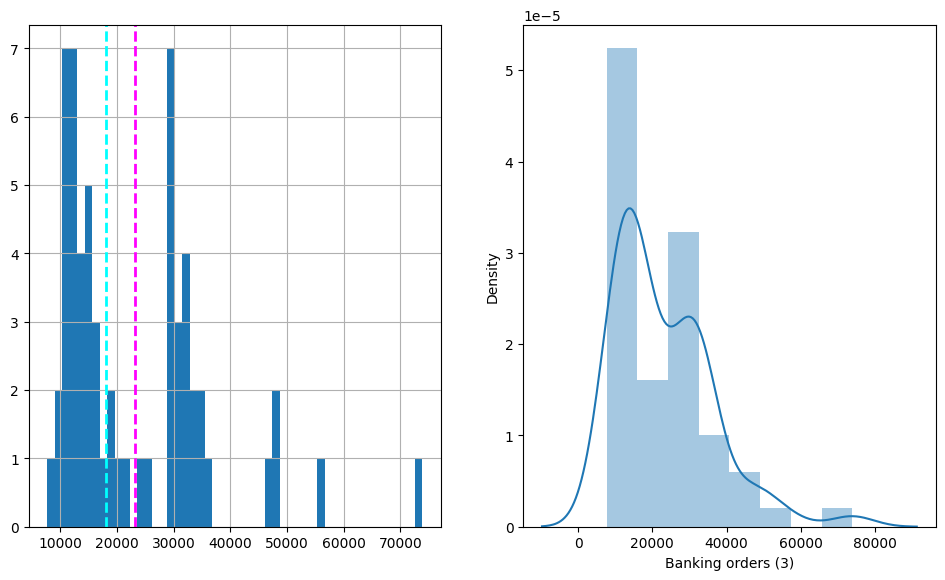



====================================================================== Target (Total orders) ======================================================================




<ipython-input-16-15089039e608>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


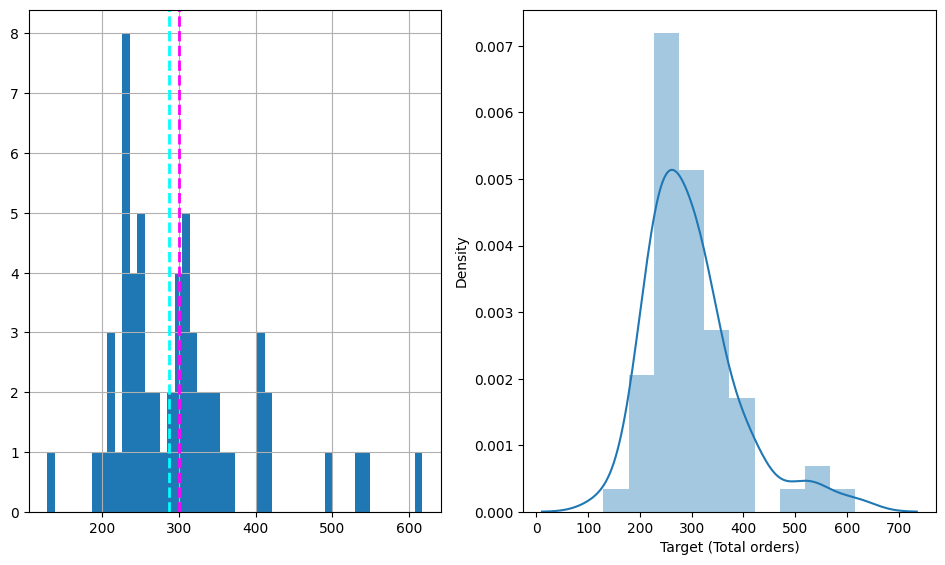

In [ ]:
#APRENDER MAS DEL DATASET QUE SE TIENE
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(50,30))
  plt.subplot(4,8,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.subplot(4,8,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()

En los gráficos de Distplot, observamos que algunas de nuestras columnas están sesgadas a la derecha y otras están sesgadas a la izquierda. Tenemos que recordar esto cuando aplicamos algoritmos. Las columnas sesgadas a la derecha son Recuento de bicicletas alquiladas (también es nuestra variable dependiente), Velocidad del viento (m/s) , Radiación solar (MJ/m2), Precipitación (mm), Nevada (cm),

Las columnas sesgadas a la izquierda son Visibilidad (10 m), Temperatura del punto de rocío (°C)

Del histograma sabemos que las características que están sesgadas, su media y la mediana también están sesgadas, lo cual se entendió mirando el gráfico que esto sucedería.

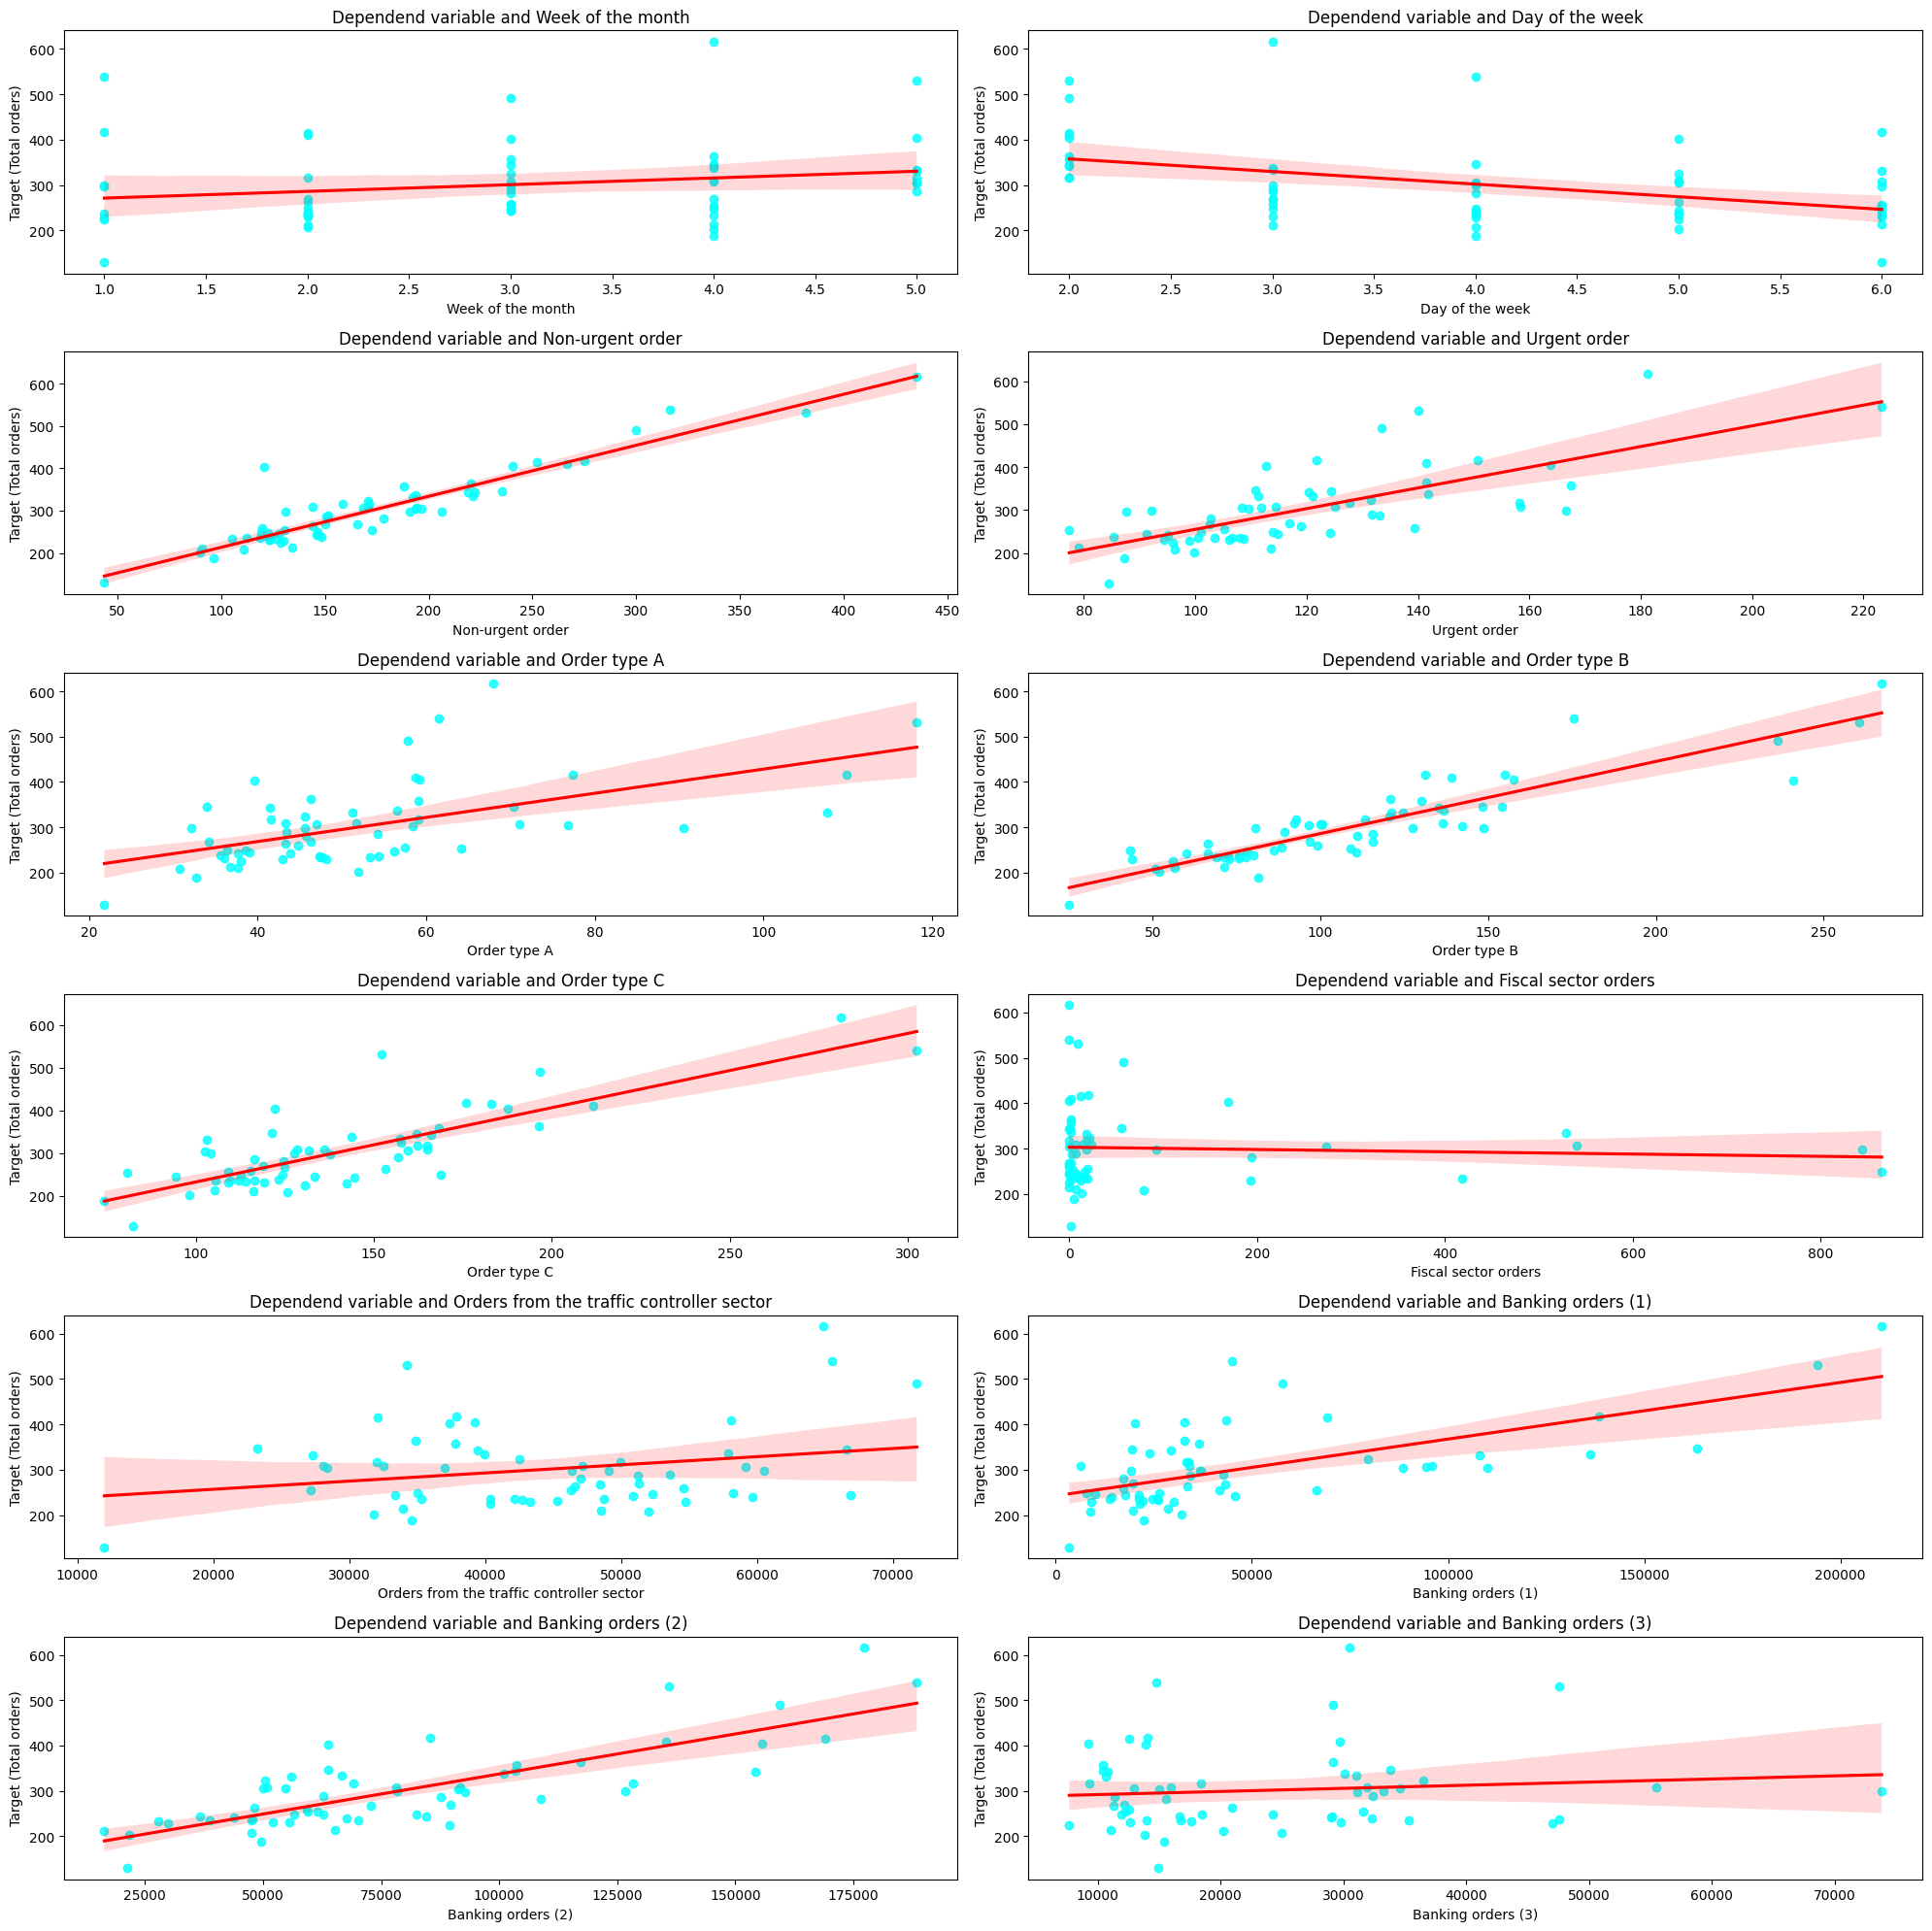

In [ ]:
# Relación entre variables numericas y nuestro target
n=1
plt.figure(figsize=(20,20))
for i in numeric_features.columns:
  if i == 'Target (Total orders)':
    pass
  else:
    plt.subplot(6,2,n)
    n+=1
    sns.regplot(x= df[i],y=  df['Target (Total orders)'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

Este gráfico de regresión muestra que algunas de nuestras características son lineales positivas y otras son lineales negativas en relación con nuestra variable objetivo.

In [ ]:
# Correlación entre el target y las variables
df.corr()['Target (Total orders)']

Week of the month                            0.211709
Day of the week                             -0.435286
Non-urgent order                             0.934518
Urgent order                                 0.729785
Order type A                                 0.559735
Order type B                                 0.900673
Order type C                                 0.804984
Fiscal sector orders                        -0.052116
Orders from the traffic controller sector    0.244712
Banking orders (1)                           0.630365
Banking orders (2)                           0.798447
Banking orders (3)                           0.100901
Target (Total orders)                        1.000000
Name: Target (Total orders), dtype: float64

<Axes: >

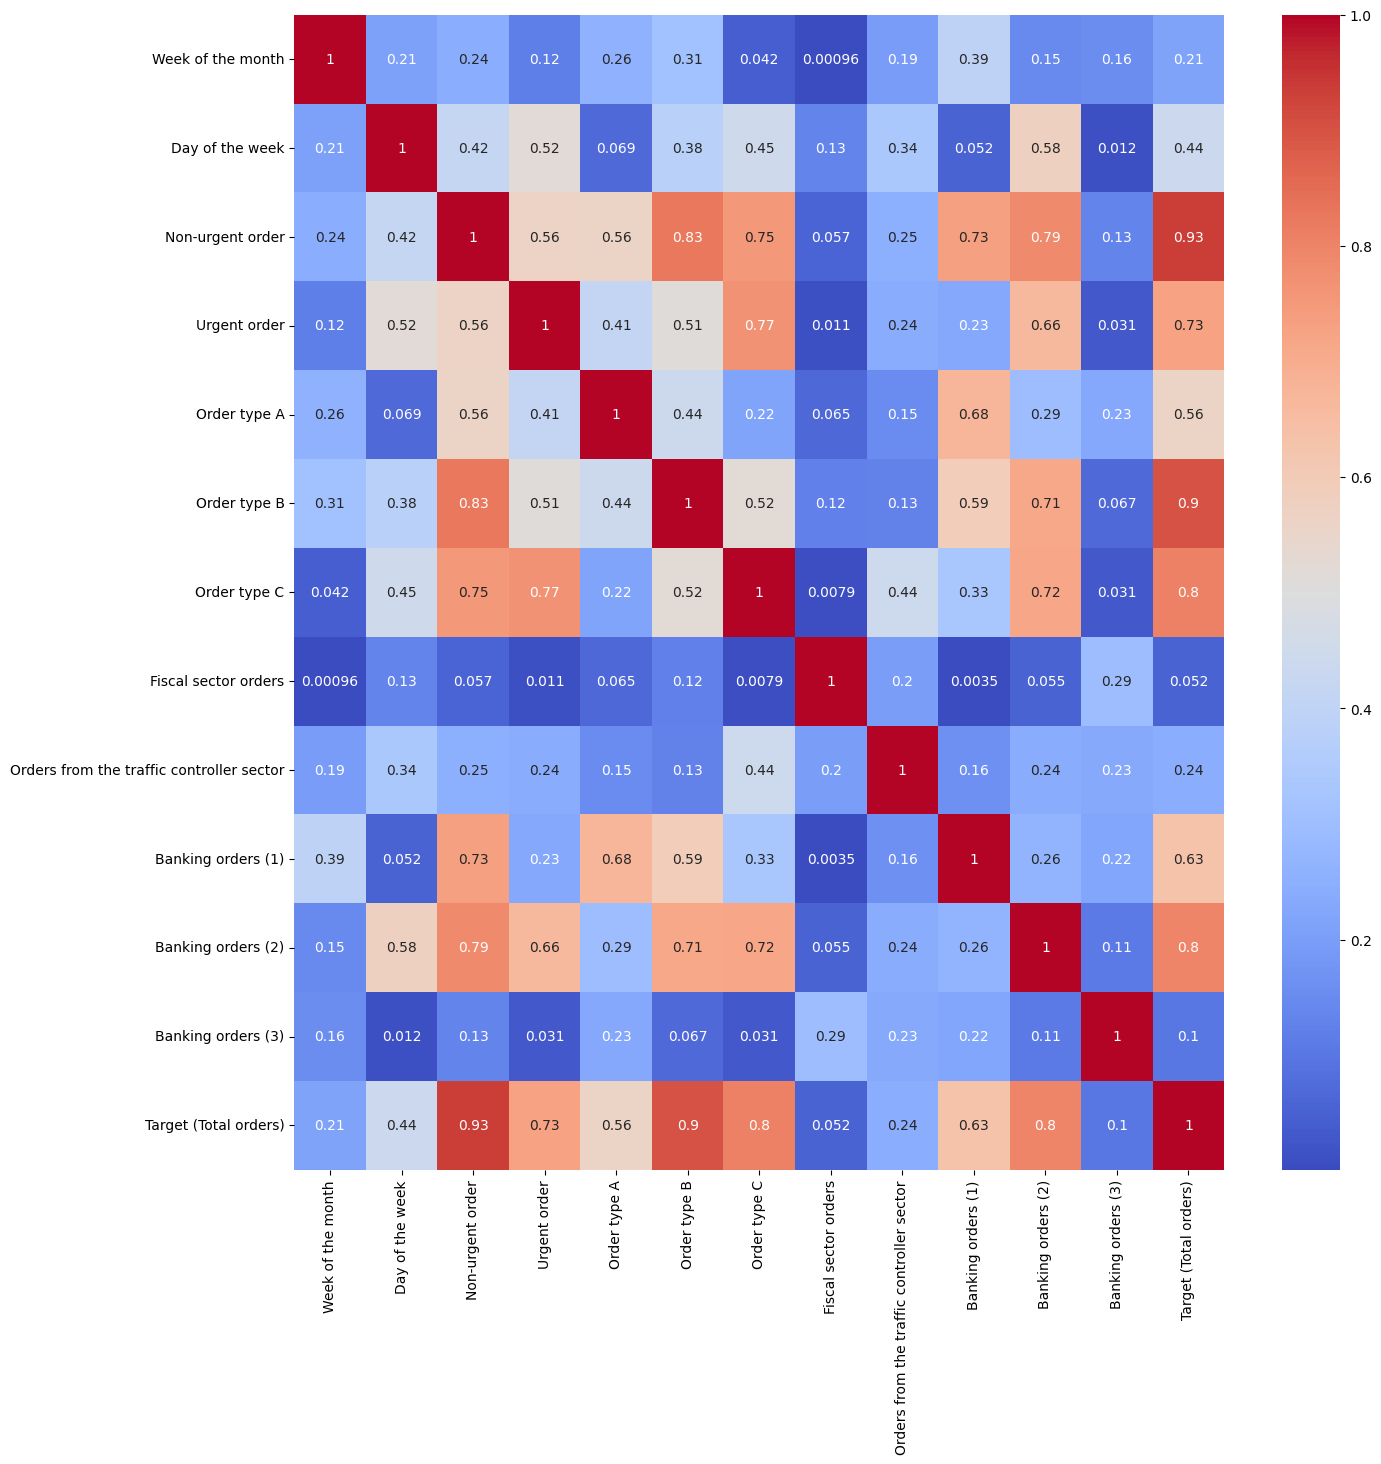

In [ ]:
#Mapa de multicorrelación entre las variables
plt.figure(figsize=(15,15))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

# **Normalziación**

La normalización se refiere al proceso de ajustar los valores de una variable para que estén dentro de un rango específico o sigan una distribución particular. Hay varios tipos de normalización que se utilizan en diferentes contextos, dependiendo de los objetivos del análisis. Aquí hay algunos tipos comunes de normalización:

1. **Min-Max Scaling**: También conocida como escala lineal, esta técnica ajusta los valores de los datos para que estén dentro de un rango específico, generalmente entre 0 y 1. La fórmula general es:


2. **Z-Score Normalization (Standardization)**: Esta técnica transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es útil cuando deseas comparar valores en diferentes escalas y cuando asumes que los datos se distribuyen normalmente. La fórmula es:


3. **Robust Scaling**: Similar a la normalización Z-Score, pero en lugar de usar la desviación estándar, utiliza el rango intercuartil (IQR) para hacer que los datos sean resistentes a los valores atípicos.

4. **Log Transformation**: Transformar los datos mediante el logaritmo puede ayudar a reducir el sesgo y la variabilidad en los datos. Es útil cuando los datos tienen una distribución asimétrica.

5. **Box-Cox Transformation**: Es una familia de transformaciones que incluye la transformación logarítmica como un caso especial. La transformación de Box-Cox busca estabilizar la varianza y hacer que los datos se asemejen a una distribución normal.

6. **Sigmoidal / Min-Max Transformation**: En casos donde deseas que los datos sigan una distribución sigmoidal, puedes aplicar una transformación que aplana los valores extremos y distribuye los datos en un rango específico.

7. **Unit Vector Scaling**: En este enfoque, cada observación se escala dividiendo por su longitud Euclidiana, de modo que la observación resultante tenga una longitud (norma) igual a 1.

8. **Feature Scaling**: Cuando trabajas con algoritmos de aprendizaje automático que utilizan medidas de distancia o magnitudes, como K-Means o algoritmos basados en gradientes, a menudo es importante escalar las características de manera que tengan un rango comparable.

9. **Percentile Ranking**: Transformar los datos en rangos percentiles puede ayudar a comparar la posición relativa de los valores en lugar de los valores absolutos.

El tipo de normalización que debes usar depende del contexto y los objetivos de tu análisis. Cada tipo de normalización tiene sus propias ventajas y desventajas, y es importante elegir el enfoque adecuado para tus datos y necesidades.

In [ ]:
df_normalized = df.apply(lambda col: (col - col.min()) / (col.max() - col.min()))#Usaremos la normalización más sencilla, investigue en que casos se pueden aplicar las demas normalizaciones
df_normalized

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0.00,0.50,0.696167,1.000000,0.412207,0.621183,1.000000,0.000000,0.896019,0.200245,1.000000,0.107527,0.842157
1,0.00,0.75,0.216983,0.127972,0.168466,0.127621,0.246444,0.000000,0.475527,0.086677,0.424709,0.000000,0.195595
2,0.00,1.00,0.000000,0.048006,0.000000,0.000000,0.035466,0.001602,0.000000,0.000000,0.028453,0.109855,0.000000
3,0.25,0.00,0.325916,0.344732,0.204625,0.364008,0.385450,0.020990,0.635313,0.146101,0.306064,0.162394,0.385405
4,0.25,0.25,0.119700,0.247808,0.164532,0.130020,0.183483,0.007467,0.611275,0.078211,0.000000,0.190115,0.166526
5,0.25,0.50,0.171769,0.130152,0.093055,0.105604,0.225784,0.091329,0.669957,0.025698,0.180878,0.261291,0.160052
6,0.25,0.75,0.256536,0.284772,0.222912,0.170285,0.346358,0.000000,0.578471,0.145589,0.185221,0.200937,0.274373
7,0.25,1.00,0.193355,0.250166,0.173925,0.251163,0.219405,0.018161,0.385430,0.110241,0.234035,0.163588,0.245454
8,0.50,0.00,0.447348,0.322209,0.126069,0.508424,0.384398,0.001218,0.913684,0.077317,0.505610,0.042004,0.441193
9,0.50,0.25,0.262648,0.162263,0.151248,0.075061,0.413682,1.000000,0.773369,0.020719,0.383628,0.064525,0.244365


**PARTICIÓN DEL DATASET**

In [ ]:
x = df_normalized.drop(columns=['Target (Total orders)','Banking orders (1)','Banking orders (2)','Banking orders (3)', 'Week of the month', 'Day of the week', 'Non-urgent order', 'Urgent order' ])
y = df_normalized['Target (Total orders)']

In [ ]:
x = df_normalized.iloc[:, 7:11]
y = df_normalized['Target (Total orders)']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [ ]:
x_train

,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2)
33,0.063584,0.188441,0.772738,0.274930
48,0.195694,0.424808,0.081108,0.275390
12,0.026821,0.343543,0.147545,0.358965
57,0.316763,0.273871,0.410285,0.435791
46,0.000000,0.712479,0.066600,0.248953
50,0.000000,0.459251,0.124787,0.800773
31,0.024592,0.510907,0.367553,0.197802
3,0.020990,0.635313,0.146101,0.306064
52,0.005564,0.378705,0.091608,0.193215
17,0.021992,0.514302,0.108995,0.066640


# **IMPLEMENTACIÓN Y SELECCIÓN DEL MODELO**


El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.8315545627092482
El score para el modelo de regresión lineal y los datos de validación es: 0.8748173464808242
MAE : 0.08991239815833564
MSE : 0.009304920689315639
RMSE : 0.09646201682172957
R2 : 0.8748173464808242


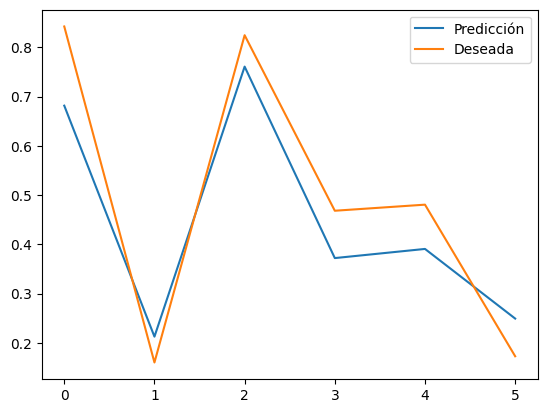

In [ ]:
#Implementación del modelo de regresión lineal multiparametrico
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train,y_train)

Score_training = Linear.score(x_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training))
Score_test= Linear.score(x_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test))

#Metricas
y_pred = Linear.predict(x_test)

MAE  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE)

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

plt.plot((y_pred)[:10])
plt.plot((np.array(y_test)[:10]))
plt.legend(["Predicción","Deseada"])
plt.show()

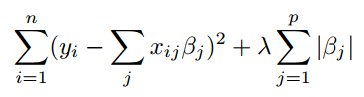

El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.8280364222781044
El score para el modelo de regresión lineal y los datos de validación es: 0.8535519421596617
MAE : 0.09678725419425183
MSE : 0.010885594169801794
RMSE : 0.10433405086452742
R2 : 0.8535519421596617


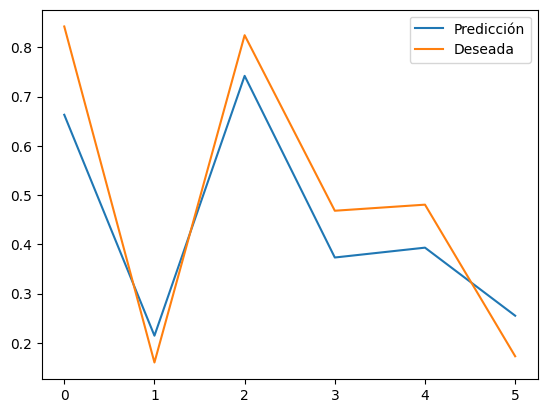

In [ ]:
#Implementación del modelo lineal con Lasso
from sklearn.linear_model import Lasso #L1
from sklearn.model_selection import GridSearchCV

# Usamos gridsearchcv para encontrar el alfa que mejor de resultado
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
linear_lasso = GridSearchCV(Lasso(), parameters, cv=5)
linear_lasso.fit(x_train,y_train)

Score_training = linear_lasso.score(x_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training))
Score_test= linear_lasso.score(x_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test))
#Metricas
y_pred = linear_lasso.predict(x_test)

MAE  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE)

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicción","Deseada"])
plt.show()

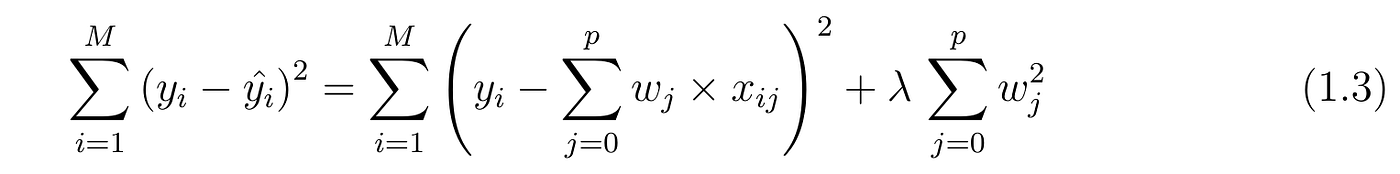

El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.8315452467019665
El score para el modelo de regresión lineal y los datos de validación es: 0.8734003483058888
MAE : 0.0904666362707058
MSE : 0.009410247228289034
RMSE : 0.09700642879876072
R2 : 0.8734003483058888


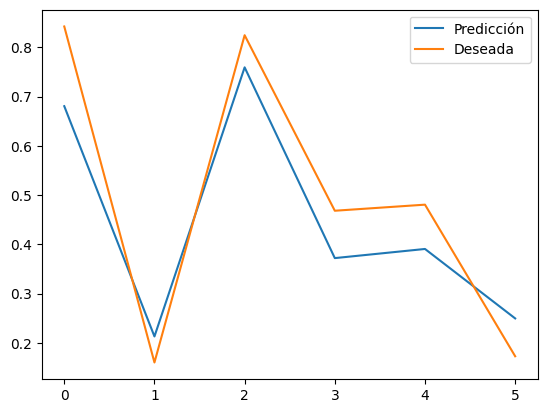

In [ ]:
#Implementación del modelo lineal con Ridge
from sklearn.linear_model import Ridge #L2

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
linear_ridge = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5)
linear_ridge.fit(x_train,y_train)

Score_training = linear_ridge.score(x_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training))
Score_test= linear_ridge.score(x_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test))
#Metricas
y_pred = linear_ridge.predict(x_test)

MAE  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE)

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicción","Deseada"])
plt.show()

El score para el modelo de regresión lineal y los datos de entrenamiento es: 0.8633193583641778
El score para el modelo de regresión lineal y los datos de validación es: 0.9131402673678735
MAE : 0.07232362018238904
MSE : 0.00645634918669697
RMSE : 0.08035141060800967
R2 : 0.9131402673678735


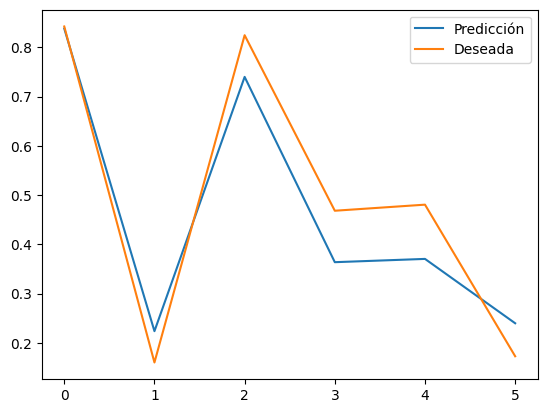

In [ ]:
#Aplicación de la regresión polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(x_train) # fit the train set
poly_X_test = poly.transform(x_test) #transform the test set

linear_poly = LinearRegression()
linear_poly.fit(poly_X_train,y_train)

Score_training = linear_poly.score(poly_X_train,y_train)
print('El score para el modelo de regresión lineal y los datos de entrenamiento es: ' + str(Score_training))
Score_test= linear_poly.score(poly_X_test,y_test)
print('El score para el modelo de regresión lineal y los datos de validación es: ' + str(Score_test))
#Metricas
y_pred = linear_poly.predict(poly_X_test)

MAE  = mean_absolute_error(y_test,y_pred)
print("MAE :" , MAE)

MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicción","Deseada"])
plt.show()
